## Installing scikit-learn

In [54]:
pip install -U scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Installing matplotlib

In [55]:
pip install -U matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 2 The Experiments

Importing Panda Librarie

In [56]:
import pandas as pd

## 1. Load the dataset in Python.

In [57]:
# Load the datasets
penguins = pd.read_csv('penguins.csv')
abalone = pd.read_csv('abalone.csv')


### a. Dataset penguins

In [58]:

# Display the first few rows of the dataset
print(penguins.head())

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7                181   
1  Adelie  Torgersen              39.5             17.4                186   
2  Adelie  Torgersen              40.3             18.0                195   
3  Adelie  Torgersen              36.7             19.3                193   
4  Adelie  Torgersen              39.3             20.6                190   

   body_mass_g     sex  
0         3750    MALE  
1         3800  FEMALE  
2         3250  FEMALE  
3         3450  FEMALE  
4         3650    MALE  



i. convert these features into 1-hot vectors (also known as dummy-coded data)

In [59]:
# Method 1: Convert to 1-hot vectors using pd.get_dummies
penguins__1hot_vectors = pd.get_dummies(penguins, columns=['island', 'sex'], )

# Display the updated dataset
print(penguins__1hot_vectors[13:20])

   species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
13  Adelie              34.4             18.4                184         3325   
14  Adelie              46.0             21.5                194         4200   
15  Adelie              37.8             18.3                174         3400   
16  Adelie              37.7             18.7                180         3600   
17  Adelie              35.9             19.2                189         3800   
18  Adelie              38.2             18.1                185         3950   
19  Adelie              38.8             17.2                180         3800   

    island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
13              0             0                 1           1         0  
14              0             0                 1           0         1  
15              1             0                 0           1         0  
16              1             0                 0      

ii. convert these features into categories yourself

In [60]:
# Method 2: Convert to categories yourself
# Mapping for 'island' feature
island_mapping = {'Torgersen': 0, 'Biscoe': 1, 'Dream': 2}
penguins['island_category'] = penguins['island'].map(island_mapping)

# Mapping for 'sex' feature
sex_mapping = {'MALE': 0, 'FEMALE': 1}
penguins['sex_category'] = penguins['sex'].map(sex_mapping)

# Drop the original categorical columns
penguins_category = penguins.drop(['island', 'sex'], axis=1)

# Display the updated dataset
print(penguins_category.head())

  species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie              39.1             18.7                181         3750   
1  Adelie              39.5             17.4                186         3800   
2  Adelie              40.3             18.0                195         3250   
3  Adelie              36.7             19.3                193         3450   
4  Adelie              39.3             20.6                190         3650   

   island_category  sex_category  
0                0             0  
1                0             1  
2                0             1  
3                0             1  
4                0             0  


### b Dataset abalone

Method 1

In [61]:
# Perform one-hot encoding on the "Type" column
abalone__1hot_vectors = pd.get_dummies(abalone, columns=['Type'])
print(abalone.head())

  Type  LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0    F         0.605     0.470   0.165       1.1775         0.6110   
1    M         0.550     0.425   0.150       0.8315         0.4110   
2    M         0.460     0.345   0.110       0.4595         0.2350   
3    F         0.650     0.475   0.165       1.3875         0.5800   
4    M         0.575     0.470   0.140       0.8375         0.3485   

   VisceraWeight  ShellWeight  Rings  
0         0.2275       0.2920      9  
1         0.1765       0.2165     10  
2         0.0885       0.1160      7  
3         0.3485       0.3095      9  
4         0.1735       0.2400     11  


Method 2

In [62]:
## a. Dataset abalone
# Method 2
sex_mapping = {'M': 0, 'F': 1, 'I': 2} 
abalone['Type_Category'] = abalone['Type'].map(sex_mapping)

# Drop the original categorical columns
abalone_category = abalone.drop(['Type'], axis=1)

# Display the updated dataset
print(abalone_category[0:9])

   LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0         0.605     0.470   0.165       1.1775         0.6110         0.2275   
1         0.550     0.425   0.150       0.8315         0.4110         0.1765   
2         0.460     0.345   0.110       0.4595         0.2350         0.0885   
3         0.650     0.475   0.165       1.3875         0.5800         0.3485   
4         0.575     0.470   0.140       0.8375         0.3485         0.1735   
5         0.495     0.375   0.120       0.5890         0.3075         0.1215   
6         0.255     0.190   0.070       0.0815         0.0280         0.0160   
7         0.670     0.525   0.180       1.4915         0.7280         0.3430   
8         0.595     0.430   0.210       1.5245         0.6530         0.3960   

   ShellWeight  Rings  Type_Category  
0       0.2920      9              1  
1       0.2165     10              0  
2       0.1160      7              0  
3       0.3095      9              1  
4   

## 2. Plot the percentage of the instances 

Importing matplot librarie

In [63]:
import matplotlib.pyplot as plt

Penguins Method 1

  species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie              39.1             18.7                181         3750   
1  Adelie              39.5             17.4                186         3800   
2  Adelie              40.3             18.0                195         3250   
3  Adelie              36.7             19.3                193         3450   
4  Adelie              39.3             20.6                190         3650   

   island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0              0             0                 1           0         1  
1              0             0                 1           1         0  
2              0             0                 1           1         0  
3              0             0                 1           1         0  
4              0             0                 1           0         1  


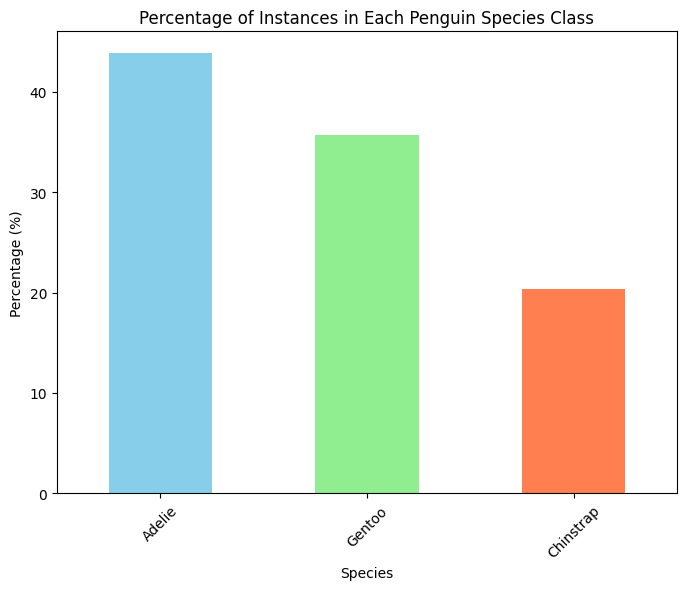

In [64]:

# Display the first few rows of the dataset
print(penguins__1hot_vectors.head())

# Plot the percentage of instances in each output class
class_counts = penguins__1hot_vectors['species'].value_counts()
class_percentages = (class_counts / len(penguins__1hot_vectors)) * 100

plt.figure(figsize=(8, 6))
class_percentages.plot(kind='bar', color=['skyblue', 'lightgreen', 'coral'])
plt.title('Percentage of Instances in Each Penguin Species Class')
plt.xlabel('Species')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)


# Save the graphic as a GIF file
plt.savefig('penguin-classes_1.png')

# Show the plot 
plt.show()


Penguins Method 2

  species  culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0  Adelie              39.1             18.7                181         3750   
1  Adelie              39.5             17.4                186         3800   
2  Adelie              40.3             18.0                195         3250   
3  Adelie              36.7             19.3                193         3450   
4  Adelie              39.3             20.6                190         3650   

   island_category  sex_category  
0                0             0  
1                0             1  
2                0             1  
3                0             1  
4                0             0  


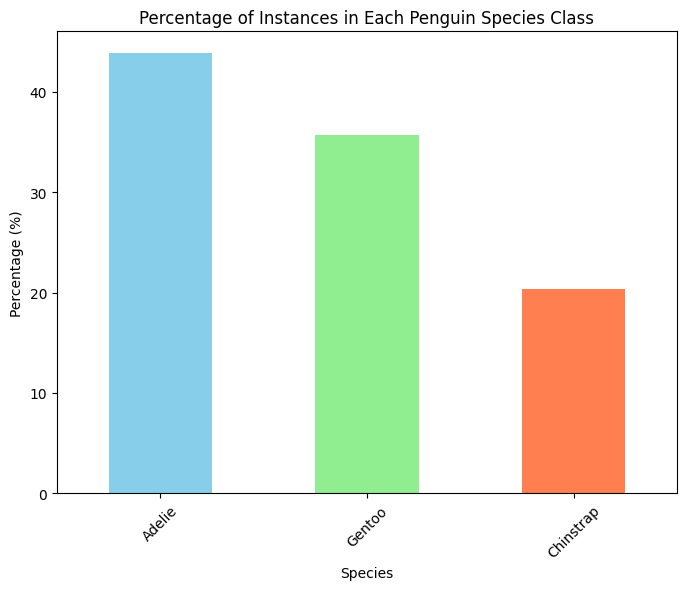

In [65]:
# Display the first few rows of the dataset
print(penguins_category.head())

# Plot the percentage of instances in each output class
class_counts = penguins_category['species'].value_counts()
class_percentages = (class_counts / len(penguins_category)) * 100

plt.figure(figsize=(8, 6))
class_percentages.plot(kind='bar', color=['skyblue', 'lightgreen', 'coral'])
plt.title('Percentage of Instances in Each Penguin Species Class')
plt.xlabel('Species')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)


# Save the graphic as a GIF file
plt.savefig('penguin-classes_2.png')

# Show the plot 
plt.show()


Abalone Method 1

   LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0         0.605     0.470   0.165       1.1775         0.6110         0.2275   
1         0.550     0.425   0.150       0.8315         0.4110         0.1765   
2         0.460     0.345   0.110       0.4595         0.2350         0.0885   
3         0.650     0.475   0.165       1.3875         0.5800         0.3485   
4         0.575     0.470   0.140       0.8375         0.3485         0.1735   

   ShellWeight  Rings  Type_F  Type_I  Type_M  
0       0.2920      9       1       0       0  
1       0.2165     10       0       0       1  
2       0.1160      7       0       0       1  
3       0.3095      9       1       0       0  
4       0.2400     11       0       0       1  


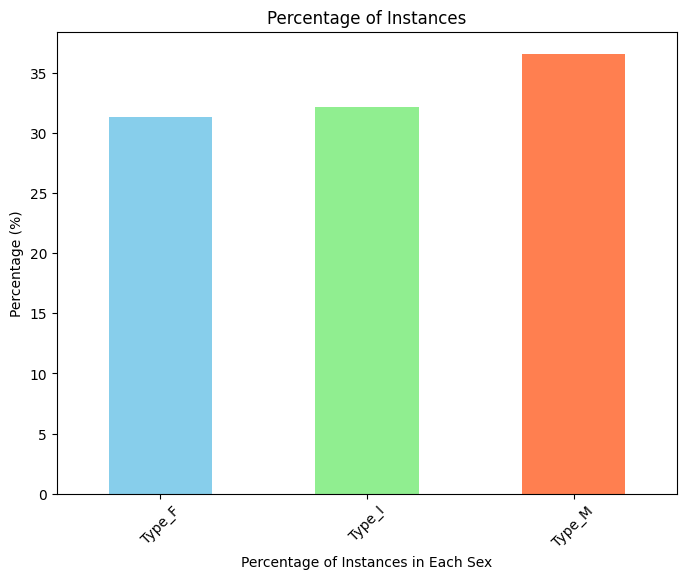

In [66]:
# Display the first few rows of the dataset
print(abalone__1hot_vectors.head())

# Plot the percentage of instances in each output class
class_counts = abalone__1hot_vectors[['Type_F', 'Type_I', 'Type_M']].sum()
class_percentages = (class_counts / len(abalone__1hot_vectors)) * 100

plt.figure(figsize=(8, 6))
class_percentages.plot(kind='bar', color=['skyblue', 'lightgreen', 'coral'])
plt.title('Percentage of Instances')
plt.xlabel('Percentage of Instances in Each Sex')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)


# Save the graphic as a GIF file
plt.savefig('abalone-classes_1.png')

# Show the plot 
plt.show()


abalone Method 2

   LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  VisceraWeight  \
0         0.605     0.470   0.165       1.1775         0.6110         0.2275   
1         0.550     0.425   0.150       0.8315         0.4110         0.1765   
2         0.460     0.345   0.110       0.4595         0.2350         0.0885   
3         0.650     0.475   0.165       1.3875         0.5800         0.3485   
4         0.575     0.470   0.140       0.8375         0.3485         0.1735   

   ShellWeight  Rings  Type_Category  
0       0.2920      9              1  
1       0.2165     10              0  
2       0.1160      7              0  
3       0.3095      9              1  
4       0.2400     11              0  


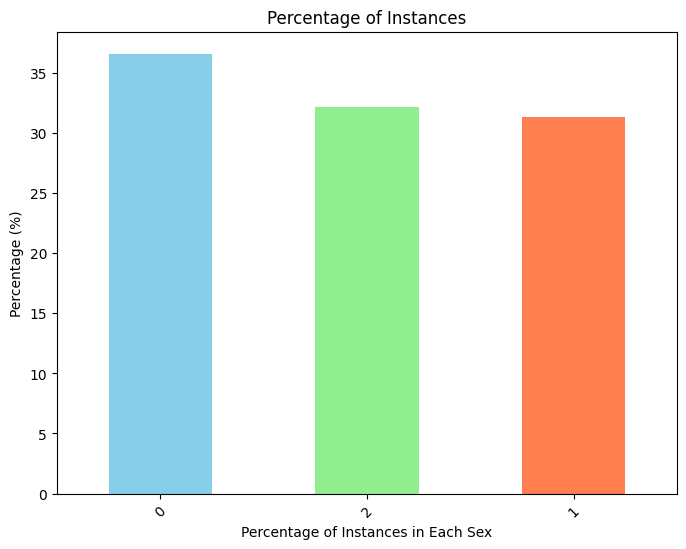

In [67]:
# Display the first few rows of the dataset
print(abalone_category.head())

# Plot the percentage of instances in each output class
class_counts = abalone_category['Type_Category'].value_counts()
class_percentages = (class_counts / len(abalone_category)) * 100

plt.figure(figsize=(8, 6))
class_percentages.plot(kind='bar', color=['skyblue', 'lightgreen', 'coral'])
plt.title('Percentage of Instances')
plt.xlabel('Percentage of Instances in Each Sex')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)


# Save the graphic as a GIF file
plt.savefig('abalone-classes_2.png')

# Show the plot 
plt.show()


## 3. Split the dataset

 using train test split using the default parameter values

In [72]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets 
X1 = penguins__1hot_vectors.drop('species', axis=1)  # Features
y1 = penguins__1hot_vectors['species']  # Target variable
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.25, random_state=42)

# Split the dataset into train and test sets 
X2 = penguins_category.drop('species', axis=1)  # Features
y2 = penguins_category['species']  # Target variable
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

# Split the dataset into train and test sets 
X3 = abalone__1hot_vectors.drop(['Type_F', 'Type_I', 'Type_M'], axis=1)  # Features
y3 = abalone__1hot_vectors[['Type_F', 'Type_I', 'Type_M']]  # Target variable
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.25, random_state=42)

# Split the dataset into train and test sets 
X4 = abalone_category.drop('Type_Category', axis=1)  # Features
y4 = abalone_category['Type_Category']  # Target variable
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.25, random_state=42)



## 4.Train and test 4 different classifiers:

### Base-DT

abalone method 1

In [78]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a Decision Tree model with default parameters
dt1 = DecisionTreeClassifier(max_depth=3)

# Fit the model to the training data
dt1.fit(X3_train, y3_train)

# Evaluate the best model on the test data
y_pred_c = dt1.predict(X3_test)

#convert multi-label to binary label because confusion matrix not designed for the prior
y_test_binary = y3_test.idxmax(axis=1)
y_pred_binary = pd.DataFrame(y_pred_c, columns=['Type_F', 'Type_I', 'Type_M']).idxmax(axis=1)
######
# Compute the confusion matrix
confusion_matrix_c = confusion_matrix(y_test_binary, y_pred_binary)
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix_c)

# Compute precision, recall, and F1-measure for each class
report_c = classification_report(y_test_binary, y_pred_binary, target_names=['Type_F', 'Type_I', 'Type_M'])
print("Classification Report (Decision Tree):")
print(report_c)

# Calculate accuracy
accuracy_c = accuracy_score(y_test_binary, y_pred_binary)

# Calculate macro-average F1
f1_macro_c = f1_score(y_test_binary, y_pred_binary, average='macro')

# Calculate weighted-average F1
f1_weighted_c = f1_score(y_test_binary, y_pred_binary, average='weighted')

print("Accuracy (Decision Tree):", accuracy_c)
print("Macro-Average F1 (Decision Tree):", f1_macro_c)
print("Weighted-Average F1 (Decision Tree):", f1_weighted_c)


####

# Plot the Decision Tree graphically
plt.figure(figsize=(12, 8))
class_names = ["Type_F", "Type_I", "Type_M"]
plot_tree(dt1, filled=True, feature_names=X3.columns, class_names=class_names, rounded=True, fontsize=10)
plt.title('Decision Tree 1-hot vector for abalone')
plt.show()


ValueError: multilabel-indicator is not supported

abalone method 2

Confusion Matrix (Decision Tree):
[[328   0  54]
 [300   0  33]
 [109   0 221]]
Classification Report (Decision Tree):
              precision    recall  f1-score   support

      Adelie       0.45      0.86      0.59       382
   Chinstrap       0.00      0.00      0.00       333
      Gentoo       0.72      0.67      0.69       330

    accuracy                           0.53      1045
   macro avg       0.39      0.51      0.43      1045
weighted avg       0.39      0.53      0.43      1045

Accuracy (Decision Tree): 0.5253588516746411
Macro-Average F1 (Decision Tree): 0.42634256029837064
Weighted-Average F1 (Decision Tree): 0.43307511553304


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


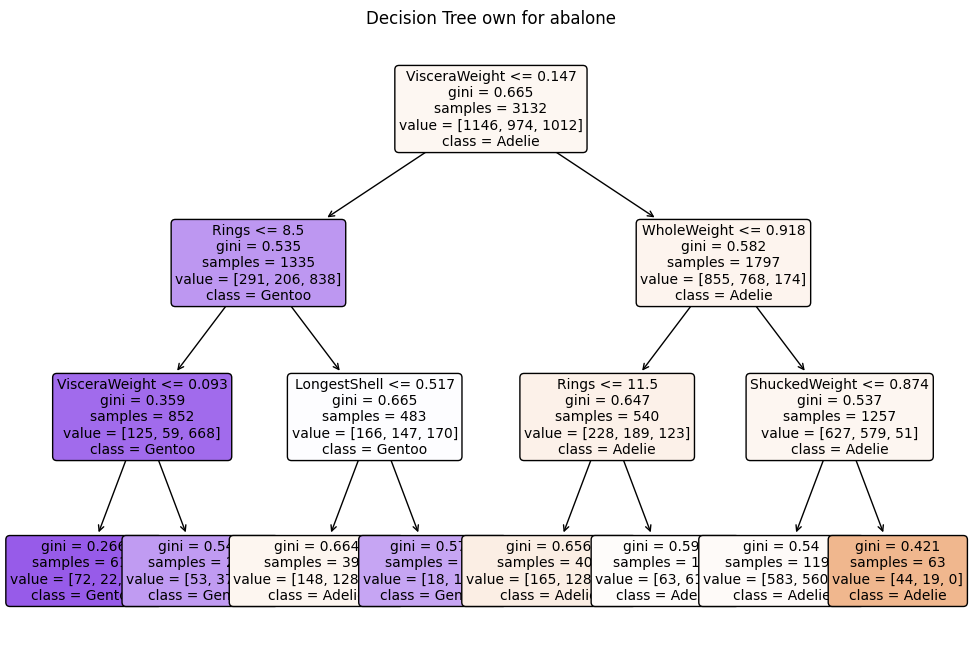

In [77]:
# Create a Decision Tree model with default parameters
dt2 = DecisionTreeClassifier(max_depth=3)

# Fit the model to the training data
dt2.fit(X4_train, y4_train)

# Evaluate the best model on the test data
y_pred_c = dt2.predict(X4_test)

######

# Compute the confusion matrix
confusion_matrix_c = confusion_matrix(y4_test, y_pred_c)
print("Confusion Matrix (Decision Tree):")
print(confusion_matrix_c)

# Compute precision, recall, and F1-measure for each class
#Convert class name to string to prevent errors
class_names_str = y.unique().astype(str)
report_c = classification_report(y4_test, y_pred_c, target_names=class_names_str)

print("Classification Report (Decision Tree):")
print(report_c)


# Calculate accuracy
accuracy_c = accuracy_score(y4_test, y_pred_c)

# Calculate macro-average F1
f1_macro_c = f1_score(y4_test, y_pred_c, average='macro')

# Calculate weighted-average F1
f1_weighted_c = f1_score(y4_test, y_pred_c, average='weighted')

print("Accuracy (Decision Tree):", accuracy_c)
print("Macro-Average F1 (Decision Tree):", f1_macro_c)
print("Weighted-Average F1 (Decision Tree):", f1_weighted_c)


####



# Plot the Decision Tree graphically
plt.figure(figsize=(12, 8))
plot_tree(dt2, filled=True, feature_names=X4.columns, class_names=class_names_str, rounded=True, fontsize=10)
plt.title('Decision Tree own for abalone')
plt.show()

### Top-DT

### Base-MLP

### Top-MLP